This is an exercise to explore dataset of Titanic survivors following my journey taking the Udacity course Intro to Data Analysis. The objective is to explore the question below.

The source of data is from Titanic dataset in Kaggle.

###### Question To Answer

What factors made people more likely to survive?

In [75]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [76]:
filename = '/titanic_data.csv'

In [92]:
titanic_df = pd.read_csv(filename)

###### To see what are the data available for the dataset.

In [93]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


My exposure to the Titanic incident is limited to the Titanic movie starring Leonardo Di Caprio and Kate Winslet :). 

From the dataset here, i would like to test a hypothesis on survivability on the factors of Class of Cabin, Sex, Age - whether adult or child, whether there are siblings. 

One of the the things I remember is that Adults give their seats in the life boats to children and women first. To distinguish children, I would like to create a segregation between Adult versus Child based on Age. 

###### A bit of Data Classification and Cleaning Up

In [94]:
titanic_df['Child/Adult'] = np.where(titanic_df['Age']<=18, 'Child', 'Adult')

If Cabin type has an influence on survivorship, I would like to find out the Cabin type of the ship based on the initials of the Cabin. 

In [95]:
titanic_df['CabinInit'] = titanic_df['Cabin'].str[:1]

Inserting these 2 new columns, and then to see the columns of the dataframe again. 

In [96]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child/Adult,CabinInit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,NaN


###### Checking the Correlation of various factors and Survival

Going through the columns of the data, i will start first with the Class of the Passengers. I will group the passengers by Class and whether they survived or not. 

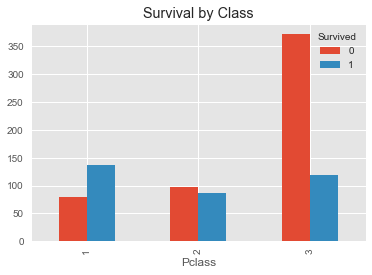

In [97]:
titanic_df.groupby(['Pclass','Survived'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival by Class')

From the observation here, those in Class 1 has rate of survival higher than other class. For every one passenger that Survived, half of that number did Not Survive. 
In Class 2, the rate of survival of is almost equal where every passenger survive is almost the same number as those Not Surviving. Those passengers in Class 3, for every 1 passenger survived three does Not Survive.

Going down the columns, I next explore Sex and how it affects Survival. 

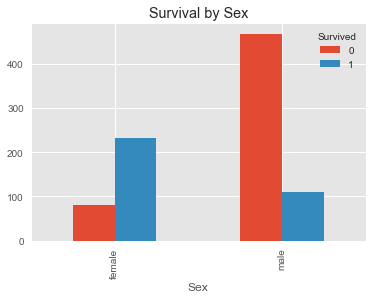

In [57]:
titanicfile_df.groupby(['Sex','Survived'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival by Sex')

Females have a higher rate of Survive where for every one that survive, half doesn't. Contrast that with for every male survived, four does Not Survive. 

I am curious then on the pattern for Adults versus Children.

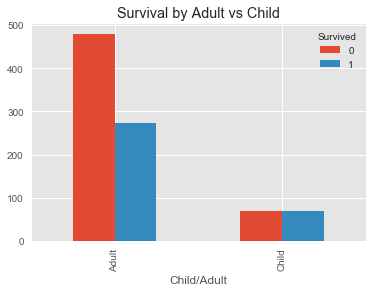

In [105]:
titanic_df.groupby(['Child/Adult','Survived'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival by Adult vs Child')

From here, I can see that rate of survival for children is high as compared to adult. Whereas for Adult, every passenger that survives, two does Not Survive. For children it is almost equal for every child that survives to one that does Not Survive. To check back against Sex, I want to see how Sex and Adult vs Child grouped together.

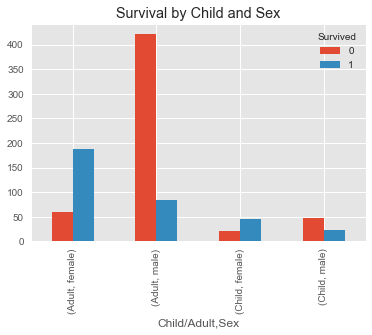

In [103]:
titanic_df.groupby(['Child/Adult','Sex','Survived'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival by Child and Sex')

I can see here that rate of Survival for Adult Male is the lowest. 

I next explore Sibling / Spouse to see the relationship to Survival.

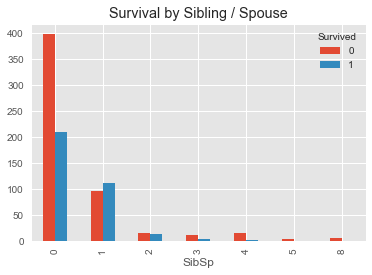

In [98]:
titanic_df.groupby(['SibSp','Survived'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival by Sibling / Spouse')

The data here shows those with zero siblings/spouse up to those with 8 siblings/spouse. 
Majority of the passengers does not have siblings/spouse. For those without siblings/spouse, for every Surviving passenger, two does Not Survive. For those with 1 Sibling/Spouse, the rate of Survival is the highest where number of survivors exceed those that does Not Survive. For the rest, those who survived is smaller number than Not Surviving. 
From here, only those with 1 sibling/spouse differs from the rest. 

I am curious about the anomaly here for those with 1 Sibling/Spouse. My hypothesis is that these could be Mothers separated from Fathers to go with the Child down the life boat. 

Now I want to check on my hypothesis for those where I believe that those with 1 Sibling / Spouse survived are likelier to be Females or Mothers. 

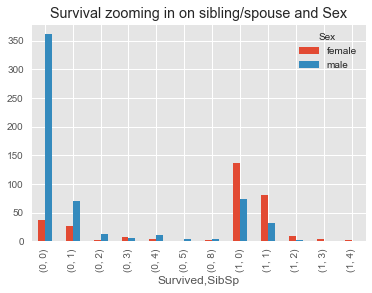

In [101]:
titanicfile_df.groupby(['Survived','SibSp','Sex'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival zooming in on sibling/spouse and Sex')

My hypothesis my be correct as by referring to the chart above, (1,1) are those that Survived with 1 Sibling / Spouse. The column in Red here are Female which can be Mothers separated from the Fathers taking care of the Children. 

I then explore the correlation between Cabin and Survival.

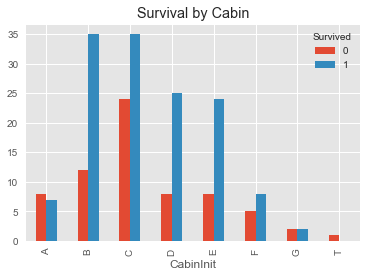

In [106]:
titanic_df.groupby(['CabinInit','Survived'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival by Cabin')

I can see here the Cabins B, C, D, E has high survival rate. I wonder is it any relation to the Class of the Cabin of which I explore grouping together next.

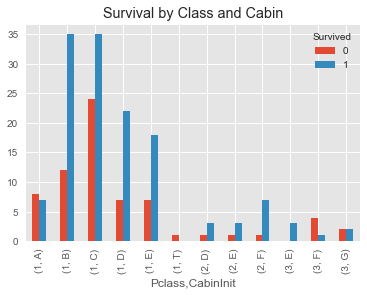

In [104]:
titanic_df.groupby(['Pclass','CabinInit','Survived'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Survival by Class and Cabin')

From here I can see that Class 1 is in Cabin A, B, C, D, E, T which may explain why the higher survival rate. 

###### Summary

Given the data and the analysis above, there are some conclusions I can make
1) Those in Class 1 has a higher survival rate compared to other Classes.
2) Next would be Women Adult which has 3 times survival rate to those who don't survive. 
3) Children has about a 50:50 chance of survival rate. 
4) If staying in Cabin, those in Cabin B,D,E has the best chance of survival. 

Limitations.
There are some limitations to this study. I did not clean the data as that is outside of the course. Also I did not try to check back the Adult Female name to the Child's name to check whether are they related. This may be addressed as I pick up further skills in my journey learning Python. 